In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
plt.style.use('ggplot')
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv ("C:\\Users\\nilli\\Downloads\\house-prices-advanced-regression-techniques\\train.csv")

In [3]:
data.drop("Id", axis = 1, inplace = True)

In [4]:
df= data.copy()

In [5]:
df["GarageYrBlt"].fillna(0, inplace=True)# house with no garage
df["LotFrontage"].fillna(69.0, inplace=True)# filled with median
df["MasVnrArea"].fillna(0, inplace=True) # house with no Masonry veneer
df["GarageCond"].fillna("No Garage", inplace=True)
df["GarageQual"].fillna("No Garage", inplace=True)
df["GarageFinish"].fillna("No Garage", inplace=True)
df["GarageType"].fillna("No Garage", inplace=True)

df["Alley"].fillna("No alley access", inplace=True)
df["MasVnrType"].fillna("None", inplace=True)
df["BsmtQual"].fillna("No Basement", inplace=True)
df["BsmtCond"].fillna("No Basement", inplace=True)
df["BsmtExposure"].fillna("No Basement", inplace=True)
df["BsmtFinType1"].fillna("No Basement", inplace=True)
df["BsmtFinType2"].fillna("No Basement", inplace=True)
df["Electrical"].fillna("SBrkr", inplace=True) ### mode
df["FireplaceQu"].fillna("No Fireplace", inplace=True)
df["PoolQC"].fillna("No Pool", inplace=True)
df["Fence"].fillna("No Fence", inplace=True)
df["MiscFeature"].fillna("None", inplace=True)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,...,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,...,0,No Pool,No Fence,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,...,0,No Pool,No Fence,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,No Pool,MnPrv,None,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,No Pool,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,4,2010,WD,Normal,142125


In [6]:
df['Exterior2nd']=df['Exterior2nd'].str.replace('CmentBd','CemntBd' )
df['Exterior2nd']=df['Exterior2nd'].str.replace('Brk Cmn','BrkComm' )
#trainFeaturesbare['Exterior2nd']=trainFeaturesbare['Exterior2nd'].str.replace('BrkComm','Other' )

material =['CemntBd','BrkFace','WdShing','Stucco','AsbShng','BrkComm','Stone','ImStucc','CBlock','AsphShn']
for mat in material:
    df['Exterior2nd']=df['Exterior2nd'].str.replace(mat,'Other' )
    
df['Exterior2nd'].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Other      158
Plywood    142
Wd Shng     38
Name: Exterior2nd, dtype: int64

In [7]:
material =['CemntBd','BrkFace','WdShing','Stucco','AsbShng','BrkComm','Stone','ImStucc','CBlock','AsphShn']
for mat in material:
    df['Exterior1st']=df['Exterior1st'].str.replace(mat,'Other' )
    
df['Exterior1st'].value_counts()  

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Other      189
Plywood    108
Name: Exterior1st, dtype: int64

In [8]:
df['Exterior1st2nd'] = pd.Series(len(df['Exterior1st']), index=df.index)
df['Exterior1st2nd'] = df['Exterior1st']
df.loc[df['Exterior1st']!=df['Exterior2nd'],'Exterior1st2nd'] = 'Other'

In [9]:
def fire(x):
    return 1 if x == 0 else 1
df['HaveFireplace'] = df.Fireplaces.apply(fire)

In [10]:
#Removing the outlier
df.drop([523,1298],axis=0,inplace=True)

In [ ]:
df['Total_size']= df['BsmtFinSF1']+ df['BsmtFinSF2'] + df['1stFlrSF'] +df['2ndFlrSF']+df['GarageArea']

In [ ]:
def helper(x):
    if x.BldgType == "TwnhsE":
        return 'Twnhs'
    else:
        return x.BldgType

df['BldgType_clean']=df.apply(helper,axis=1)

In [ ]:
df['Outdoor_Porch_Size']= df['WoodDeckSF']+df['OpenPorchSF']

In [ ]:
df["AllPorchSF"] = df["OpenPorchSF"] + df["EnclosedPorch"] + df["3SsnPorch"] + df["ScreenPorch"]

In [ ]:
def recent_constr(x):
    if(x.YearBuilt < x.YearRemodAdd):
        return x.YearRemodAdd
    else: 
        return x.YearBuilt

#defining intermediate column 2    
df['Recent_yr'] = df.apply(recent_constr,axis=1)

#time to sale helper defined:
def time_to_sale(x):
    return x.YrSold - x.Recent_yr

#new column defined to be used in Train
df['Age_at_sale']=df.apply(time_to_sale,axis=1)

In [ ]:
Xh=df[["Neighborhood", "OverallQual", "Total_size", "KitchenQual", "Age_at_sale", "ExterQual",
                   "YrSold",  "LotArea", 'BldgType_clean', 'Outdoor_Porch_Size', "Fireplaces", "SalePrice"]]

In [ ]:
Xh["Logprice"] = np.log(Xh["SalePrice"])
Xh["Logprice"]

In [ ]:
from sklearn.preprocessing import OneHotEncoder

#dummify Neighborhood column
Neighborhood_ohe = OneHotEncoder( drop='first', sparse = False )
Neighborhood_enc = Neighborhood_ohe.fit_transform( Xh[['Neighborhood']] )
Neighborhood_enc = pd.DataFrame( Neighborhood_enc, columns=Neighborhood_ohe.get_feature_names(['Neighborhood']) )
Xh = pd.concat( (X2.drop(["Neighborhood"], axis=1).reset_index(drop = True), Neighborhood_enc), axis = 1 )

#dummify ExterQual Column
ExterQual_ohe = OneHotEncoder( drop='first', sparse = False )
ExterQual_enc = ExterQual_ohe.fit_transform( Xh[['ExterQual']] )
ExterQual_enc = pd.DataFrame( ExterQual_enc, columns=ExterQual_ohe.get_feature_names(['ExterQual']) )
Xh = pd.concat( (Xh.drop(["ExterQual"], axis=1).reset_index(drop = True), ExterQual_enc), axis = 1 )

# dummify Fireplaces column
Fireplaces_ohe = OneHotEncoder( drop='first', sparse = False, categories="auto" )
Fireplaces_enc = Fireplaces_ohe.fit_transform(Xh[['Fireplaces']] )
Fireplaces_enc = pd.DataFrame( Fireplaces_enc, columns=Fireplaces_ohe.get_feature_names(['Fireplaces']) )
Xh = pd.concat( (Xh.drop(["Fireplaces"], axis=1).reset_index(drop = True), Fireplaces_enc), axis = 1 )


# dummify KitchenQual column
from sklearn.preprocessing import OneHotEncoder
KitchenQual_ohe = OneHotEncoder( drop='first', sparse = False )
KitchenQual_enc = KitchenQual_ohe.fit_transform( Xh[['KitchenQual']] )
KitchenQual_enc = pd.DataFrame( KitchenQual_enc, columns=KitchenQual_ohe.get_feature_names(['KitchenQual']) )
Xh = pd.concat( (Xh.drop(["KitchenQual"], axis=1).reset_index(drop = True), KitchenQual_enc), axis = 1 )

#dummify Building Type
BldgType_clean_ohe = OneHotEncoder( drop='first', sparse = False )
BldgType_clean_enc = BldgType_clean_ohe.fit_transform( Xh[['BldgType_clean']] )
BldgType_clean_enc = pd.DataFrame( BldgType_clean_enc, columns=BldgType_clean_ohe.get_feature_names(['BldgType_clean']) )
Xh = pd.concat( (Xh.drop(["BldgType_clean"], axis=1).reset_index(drop = True), BldgType_clean_enc), axis = 1 )


Xh.head()

In [ ]:
ylh = Xh[["Logprice"]]
Xlh = Xh.drop(["SalePrice", "Logprice"], axis=1)
print(Xlh.shape)
print(ylh.shape)

In [ ]:
np.random.seed(0)
from sklearn.model_selection import train_test_split

Xhtrain, Xhtest, yhtrain, yhtest = train_test_split( Xh,yh, test_size = 0.2  )
print(Xhtrain.shape)
print(yhtrain.shape)

In [11]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xhtrain = pd.DataFrame( ss.fit_transform(Xhtrain), columns = Xhtrain.columns)
Xhtrain.head()

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lassoh = Lasso(warm_start = True, max_iter = 1e7)

params = {'alpha':np.logspace(-6, 0, 100)}
grid_search_lasso = GridSearchCV( estimator=lassoh, param_grid=params, cv=5 )
grid_search_lasso.fit(Xhtrain,yhtrain)

In [ ]:
grid_search_lasso.best_params_

In [ ]:
grid_search_lasso.best_score_

In [ ]:
lassoh.fit(Xhtest, yhtest).coef_
lst = []
for i in (list(zip(lassol.fit(Xhtest, yhtest).coef_, Xtest.columns))):
    lst.append(i)
sorted(lst)

In [12]:
X2.dtypes

Neighborhood     object
OverallQual       int64
YearBuilt         int64
YearRemodAdd      int64
RoofStyle        object
ExterQual        object
Foundation       object
BsmtFinSF1        int64
HaveFireplace     int64
BsmtFinSF2        int64
BsmtUnfSF         int64
TotalBsmtSF       int64
HeatingQC        object
Exterior2nd      object
Exterior1st      object
GrLivArea         int64
KitchenQual      object
Fireplaces        int64
GarageArea        int64
SalePrice         int64
dtype: object

In [13]:
X2["Logprice"] = np.log(X2["SalePrice"])
X2["Logprice"]

C:\Users\nilli\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: Logprice, Length: 1458, dtype: float64

In [14]:
#Dummifying Neighborhood, ExterQual, KitchenQual, and Fireplaces columns

from sklearn.preprocessing import OneHotEncoder

#dummify Neighborhood column
Neighborhood_ohe = OneHotEncoder( drop='first', sparse = False )
Neighborhood_enc = Neighborhood_ohe.fit_transform( X2[['Neighborhood']] )
Neighborhood_enc = pd.DataFrame( Neighborhood_enc, columns=Neighborhood_ohe.get_feature_names(['Neighborhood']) )
X2 = pd.concat( (X2.drop(["Neighborhood"], axis=1).reset_index(drop = True), Neighborhood_enc), axis = 1 )

#dummify ExterQual Column
ExterQual_ohe = OneHotEncoder( drop='first', sparse = False )
ExterQual_enc = ExterQual_ohe.fit_transform( X2[['ExterQual']] )
ExterQual_enc = pd.DataFrame( ExterQual_enc, columns=ExterQual_ohe.get_feature_names(['ExterQual']) )
X2 = pd.concat( (X2.drop(["ExterQual"], axis=1).reset_index(drop = True), ExterQual_enc), axis = 1 )

# # dummify Fireplaces column
# Fireplaces_ohe = OneHotEncoder( drop='first', sparse = False, categories="auto" )
# Fireplaces_enc = Fireplaces_ohe.fit_transform(X2[['Fireplaces']] )
# Fireplaces_enc = pd.DataFrame( Fireplaces_enc, columns=Fireplaces_ohe.get_feature_names(['Fireplaces']) )
# X2 = pd.concat( (X2.drop(["Fireplaces"], axis=1).reset_index(drop = True), Fireplaces_enc), axis = 1 )


# dummify KitchenQual column
from sklearn.preprocessing import OneHotEncoder
KitchenQual_ohe = OneHotEncoder( drop='first', sparse = False )
KitchenQual_enc = KitchenQual_ohe.fit_transform( X2[['KitchenQual']] )
KitchenQual_enc = pd.DataFrame( KitchenQual_enc, columns=KitchenQual_ohe.get_feature_names(['KitchenQual']) )
X2 = pd.concat( (X2.drop(["KitchenQual"], axis=1).reset_index(drop = True), KitchenQual_enc), axis = 1 )


# dummify RoofStyle column
RoofStyle_ohe = OneHotEncoder( drop='first', sparse = False )
RoofStyle_enc = RoofStyle_ohe.fit_transform( X2[['RoofStyle']] )
RoofStyle_enc = pd.DataFrame( RoofStyle_enc, columns=RoofStyle_ohe.get_feature_names(['RoofStyle']) )
X2 = pd.concat( (X2.drop(["RoofStyle"], axis=1).reset_index(drop = True), RoofStyle_enc), axis = 1 )
X2.head()

#dummify Exterior1st Column
Exterior1st_ohe = OneHotEncoder( drop='first', sparse = False )
Exterior1st_enc = Exterior1st_ohe.fit_transform(X2[['Exterior1st']] )
Exterior1st_enc = pd.DataFrame( Exterior1st_enc, columns=Exterior1st_ohe.get_feature_names(['Exterior1st']) )
X2 = pd.concat( (X2.drop(["Exterior1st"], axis=1).reset_index(drop = True), Exterior1st_enc), axis = 1 )
X2.head()

#dummify Exterior2nd Column
Exterior2nd_ohe = OneHotEncoder( drop='first', sparse = False )
Exterior2nd_enc = Exterior2nd_ohe.fit_transform( X2[['Exterior2nd']] )
Exterior2nd_enc = pd.DataFrame( Exterior2nd_enc, columns=Exterior2nd_ohe.get_feature_names(['Exterior2nd']) )
X2 = pd.concat( (X2.drop(["Exterior2nd"], axis=1).reset_index(drop = True), Exterior2nd_enc), axis = 1 )
X2.head()

#dummify Foundation Column
Foundation_ohe = OneHotEncoder( drop='first', sparse = False )
Foundation_enc = Foundation_ohe.fit_transform( X2[['Foundation']] )
Foundation_enc = pd.DataFrame( Foundation_enc, columns=Foundation_ohe.get_feature_names(['Foundation']) )
X2 = pd.concat( (X2.drop(["Foundation"], axis=1).reset_index(drop = True), Foundation_enc), axis = 1 )
X2.head()

#dummify Heating QC Column
HeatingQC_ohe = OneHotEncoder( drop='first', sparse = False )
HeatingQC_enc = HeatingQC_ohe.fit_transform( X2[['HeatingQC']] )
HeatingQC_enc = pd.DataFrame( HeatingQC_enc, columns=HeatingQC_ohe.get_feature_names(['HeatingQC']) )
X2 = pd.concat( (X2.drop(["HeatingQC"], axis=1).reset_index(drop = True), HeatingQC_enc), axis = 1 )
X2.head()

#dummify df["HaveFireplace"]
HaveFireplace_ohe = OneHotEncoder( drop='first', sparse = False )
HaveFireplace_enc = HaveFireplace_ohe.fit_transform( X2[["HaveFireplace"]] )
HaveFireplace_enc = pd.DataFrame( HaveFireplace_enc, columns=HaveFireplace_ohe.get_feature_names(["HaveFireplace"]) )
X2 = pd.concat( (X2.drop(["HaveFireplace"], axis=1).reset_index(drop = True), HaveFireplace_enc), axis = 1 )

# #dummify YrSold
# YrSold_ohe = OneHotEncoder( drop='first', sparse = False, categories="auto" )
# YrSold_enc = YrSold_ohe.fit_transform( X2[['YrSold']] )
# YrSold_enc = pd.DataFrame( YrSold_enc, columns=YrSold_ohe.get_feature_names(['YrSold']) )
# X2 = pd.concat( (X2.drop(["YrSold"], axis=1).reset_index(drop = True), YrSold_enc), axis = 1 )
# X2.head()


X2.head()

,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,GrLivArea,Fireplaces,GarageArea,...,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA
0,7,2003,2003,706,0,150,856,1710,0,548,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6,1976,1976,978,0,284,1262,1262,1,460,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,2001,2002,486,0,434,920,1786,1,608,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7,1915,1970,216,0,540,756,1717,1,642,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,8,2000,2000,655,0,490,1145,2198,1,836,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
y = X2[["Logprice"]]
X = X2.drop(["SalePrice", "Logprice"], axis=1)
print(X.shape)
print(y.shape)

(1458, 65)
(1458, 1)


In [16]:
np.random.seed(0)
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split( X,y, test_size = 0.2  )
print(Xtrain.shape)
print(ytrain.shape)

(1166, 65)
(1166, 1)


In [17]:
Xtrain.head()

,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,GrLivArea,Fireplaces,GarageArea,...,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA
1170,6,1958,1958,662,0,599,1261,1261,1,433,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75,4,1973,1973,462,0,0,462,988,0,297,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
390,5,1900,1950,241,391,229,861,1367,0,384,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1282,6,1971,1971,0,0,912,912,1824,0,0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
682,9,2002,2002,1059,0,567,1626,1668,1,702,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xtrain = pd.DataFrame( ss.fit_transform(Xtrain), columns = Xtrain.columns)
Xtrain.head()

,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,GrLivArea,Fireplaces,GarageArea,...,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA
0,-0.062929,-0.406731,-1.281044,0.536553,-0.287120,0.064914,0.520201,-0.506754,0.596296,-0.170853,...,-0.162507,1.140089,-0.875595,-0.132106,-0.071919,-0.041451,-0.193304,-0.460498,-0.029298,-0.644243
1,-1.545262,0.083533,-0.556488,0.072910,-0.287120,-1.316718,-1.426461,-1.052163,-0.941936,-0.820009,...,-0.162507,1.140089,-0.875595,-0.132106,-0.071919,-0.041451,-0.193304,-0.460498,-0.029298,1.552210
2,-0.804096,-2.302418,-1.667475,-0.439415,2.149174,-0.788514,-0.454348,-0.294984,-0.941936,-0.404740,...,-0.162507,-0.877125,-0.875595,-0.132106,-0.071919,-0.041451,-0.193304,-0.460498,-0.029298,-0.644243
3,-0.062929,0.018164,-0.653095,-0.998105,-0.287120,0.786869,-0.330093,0.618026,-0.941936,-2.237651,...,6.153590,1.140089,-0.875595,-0.132106,-0.071919,-0.041451,-0.193304,-0.460498,-0.029298,1.552210
4,2.160570,1.031376,0.844322,1.456885,-0.287120,-0.008896,1.409478,0.306364,0.596296,1.113139,...,-0.162507,-0.877125,1.142080,-0.132106,-0.071919,-0.041451,-0.193304,-0.460498,-0.029298,-0.644243


In [19]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [20]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso2 = Lasso(warm_start = True, max_iter = 1e7)

params = {'alpha':np.logspace(-6, 0, 100)}
grid_search_lasso = GridSearchCV( estimator=lasso2, param_grid=params, cv=5 )
grid_search_lasso.fit(Xtrain,ytrain)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=10000000.0, normalize=False,
                             positive=False, precompute=False,
                             random_state=None, selection='cyclic', tol=0.0001,
                             warm_start=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.00000000e-06, 1.14975700e-06, 1.32194115e-06, 1.51991108e-06,
       1.74752840...
       7.05480231e-02, 8.11130831e-02, 9.32603347e-02, 1.07226722e-01,
       1.23284674e-01, 1.41747416e-01, 1.62975083e-01, 1.87381742e-01,
       2.15443469e-01, 2.47707636e-01, 2.84803587e-01, 3.27454916e-01,
       3.76493581e-01, 4.32876128e-01, 4.97702356e-01, 5.72236766e-01,
       6.57933225e-01, 7.56463328e-01, 8.69749003e-01, 1.00000000e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, ver

In [21]:
grid_search_lasso.best_params_

{'alpha': 0.0009326033468832199}

In [22]:
grid_search_lasso.cv_results_

{'mean_fit_time': array([0.0139627 , 0.01116943, 0.01136885, 0.01077089, 0.01336432,
        0.01336408, 0.01176815, 0.01116967, 0.01037235, 0.0101728 ,
        0.01097269, 0.0103723 , 0.01037216, 0.01077199, 0.00977354,
        0.0101728 , 0.00977421, 0.0105732 , 0.00897565, 0.04567814,
        0.0388957 , 0.03650227, 0.02792478, 0.02533188, 0.0221405 ,
        0.01954756, 0.01855035, 0.01655545, 0.01456141, 0.01355548,
        0.01116991, 0.01077118, 0.00878282, 0.00837703, 0.00678186,
        0.00638294, 0.0071806 , 0.0065824 , 0.00538564, 0.00458755,
        0.0047874 , 0.00398955, 0.00459456, 0.00458689, 0.0045918 ,
        0.00358987, 0.00358977, 0.00398984, 0.00378981, 0.00398932,
        0.00319138, 0.00299182, 0.00299196, 0.00299182, 0.00279264,
        0.00279274, 0.00319138, 0.00259304, 0.00279245, 0.00259318,
        0.00279245, 0.00219421, 0.00299196, 0.00219417, 0.00259333,
        0.00259323, 0.00259352, 0.00279222, 0.0029923 , 0.00239239,
        0.00219431, 0.00259295,

In [23]:
grid_search_lasso.best_score_

0.8819872669088568

In [24]:
lasso2.fit(Xtest, ytest).coef_
lst = []
for i in (list(zip(lasso2.fit(Xtest, ytest).coef_, Xtest.columns))):
    lst.append(i)
sorted(lst)

[(-0.0, 'BsmtFinSF2'),
 (-0.0, 'ExterQual_Fa'),
 (0.0, 'ExterQual_Gd'),
 (-0.0, 'ExterQual_TA'),
 (-0.0, 'Exterior1st_MetalSd'),
 (0.0, 'Exterior1st_Other'),
 (-0.0, 'Exterior1st_Plywood'),
 (0.0, 'Exterior1st_VinylSd'),
 (-0.0, 'Exterior1st_Wd Sdng'),
 (-0.0, 'Exterior2nd_MetalSd'),
 (-0.0, 'Exterior2nd_Other'),
 (-0.0, 'Exterior2nd_Plywood'),
 (0.0, 'Exterior2nd_VinylSd'),
 (-0.0, 'Exterior2nd_Wd Sdng'),
 (0.0, 'Exterior2nd_Wd Shng'),
 (0.0, 'Fireplaces'),
 (-0.0, 'Foundation_CBlock'),
 (0.0, 'Foundation_PConc'),
 (-0.0, 'Foundation_Slab'),
 (0.0, 'Foundation_Stone'),
 (-0.0, 'Foundation_Wood'),
 (-0.0, 'HeatingQC_Fa'),
 (-0.0, 'HeatingQC_Gd'),
 (0.0, 'HeatingQC_Po'),
 (-0.0, 'HeatingQC_TA'),
 (-0.0, 'KitchenQual_Fa'),
 (0.0, 'KitchenQual_Gd'),
 (-0.0, 'KitchenQual_TA'),
 (-0.0, 'Neighborhood_Blueste'),
 (-0.0, 'Neighborhood_BrDale'),
 (0.0, 'Neighborhood_BrkSide'),
 (-0.0, 'Neighborhood_ClearCr'),
 (0.0, 'Neighborhood_CollgCr'),
 (0.0, 'Neighborhood_Crawfor'),
 (0.0, 'Neighborhood_E

In [25]:
from sklearn.metrics import mean_squared_error
print("R^2: {}".format(lasso2.score(Xtest, ytest)))
mse=(mean_squared_error(ytest, lasso2.predict(Xtest)))
print("Mean Squared Error: {}".format(mse))
rmse = np.sqrt(mean_squared_error(ytest, lasso2.predict(Xtest)))
print("Root Mean Squared Error: {}".format(rmse))  

R^2: 0.8531042097605774
Mean Squared Error: 0.024895099605960206
Root Mean Squared Error: 0.15778181012385492


In [26]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso3 = Lasso(warm_start = True, max_iter = 1e7)

params = {'alpha':np.linspace(0.8821523226753236, 0.0001, 100)}
grid_search_lasso = GridSearchCV( estimator=lasso3, param_grid=params, cv=5 )
grid_search_lasso.fit(Xtrain,ytrain)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=10000000.0, normalize=False,
                             positive=False, precompute=False,
                             random_state=None, selection='cyclic', tol=0.0001,
                             warm_start=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([8.82152323e-01, 8.73242703e-01, 8.64333084e-01, 8.55423464e-01,
       8.46513845...
       1.69382769e-01, 1.60473150e-01, 1.51563530e-01, 1.42653911e-01,
       1.33744291e-01, 1.24834672e-01, 1.15925052e-01, 1.07015433e-01,
       9.81058136e-02, 8.91961942e-02, 8.02865748e-02, 7.13769554e-02,
       6.24673359e-02, 5.35577165e-02, 4.46480971e-02, 3.57384777e-02,
       2.68288583e-02, 1.79192388e-02, 9.00961942e-03, 1.00000000e-04])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, ver

In [27]:
grid_search_lasso.best_params_

{'alpha': 0.0001}

In [28]:
grid_search_lasso.best_score_

0.8805224161730232

In [29]:
lasso3.fit(Xtest, ytest).coef_
lst = []
for i in (list(zip(lasso3.fit(Xtest, ytest).coef_, Xtest.columns))):
    lst.append(i)
lst

[(0.0, 'OverallQual'),
 (0.002133917805373058, 'YearBuilt'),
 (0.001259059417086582, 'YearRemodAdd'),
 (0.00013531476953433113, 'BsmtFinSF1'),
 (-0.0, 'BsmtFinSF2'),
 (3.2164575134368606e-06, 'BsmtUnfSF'),
 (0.0002075315646276523, 'TotalBsmtSF'),
 (0.00038067755753557603, 'GrLivArea'),
 (0.0, 'Fireplaces'),
 (0.000355943527861397, 'GarageArea'),
 (-0.0, 'Neighborhood_Blueste'),
 (-0.0, 'Neighborhood_BrDale'),
 (0.0, 'Neighborhood_BrkSide'),
 (-0.0, 'Neighborhood_ClearCr'),
 (0.0, 'Neighborhood_CollgCr'),
 (0.0, 'Neighborhood_Crawfor'),
 (0.0, 'Neighborhood_Edwards'),
 (0.0, 'Neighborhood_Gilbert'),
 (-0.0, 'Neighborhood_IDOTRR'),
 (-0.0, 'Neighborhood_MeadowV'),
 (-0.0, 'Neighborhood_Mitchel'),
 (-0.0, 'Neighborhood_NAmes'),
 (0.0, 'Neighborhood_NPkVill'),
 (-0.0, 'Neighborhood_NWAmes'),
 (-0.0, 'Neighborhood_NoRidge'),
 (0.0, 'Neighborhood_NridgHt'),
 (-0.0, 'Neighborhood_OldTown'),
 (-0.0, 'Neighborhood_SWISU'),
 (-0.0, 'Neighborhood_Sawyer'),
 (-0.0, 'Neighborhood_SawyerW'),
 (0.0, 

In [30]:
from sklearn.metrics import mean_squared_error
print("R^2: {}".format(lasso3.score(Xtest, ytest)))
mse=(mean_squared_error(ytest, lasso3.predict(Xtest)))
print("Mean Squared Error: {}".format(mse))
rmse = np.sqrt(mean_squared_error(ytest, lasso3.predict(Xtest)))
print("Root Mean Squared Error: {}".format(rmse))  

R^2: 0.8531042097605774
Mean Squared Error: 0.024895099605960206
Root Mean Squared Error: 0.15778181012385492


In [31]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
ridge = Ridge()
lasso = Lasso()
net   = ElasticNet()




In [35]:
ridge.set_params(alpha=10)
ridge.fit( Xtrain,ytrain)
ridge.score( Xtrain,ytrain)# 

0.8974818240876182

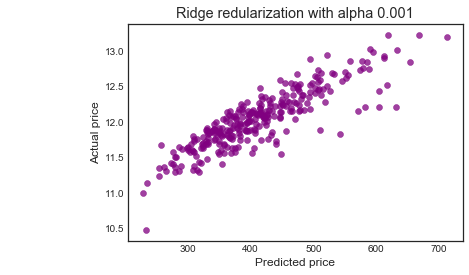

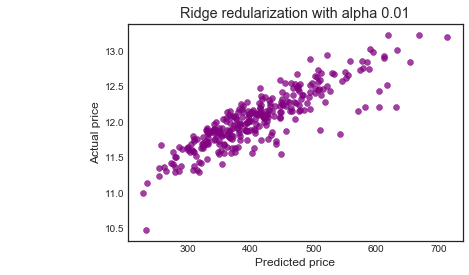

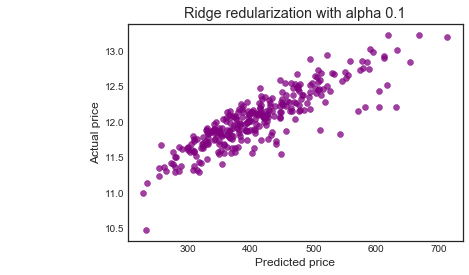

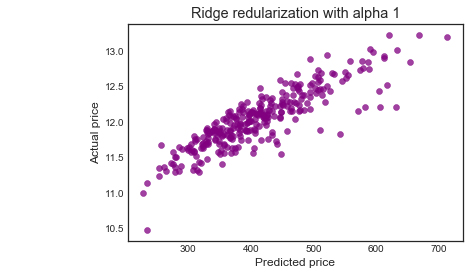

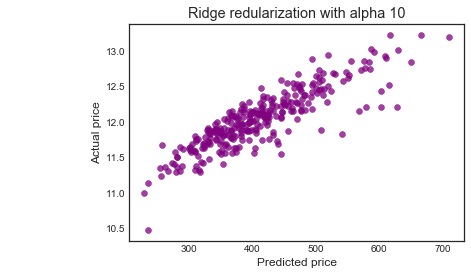

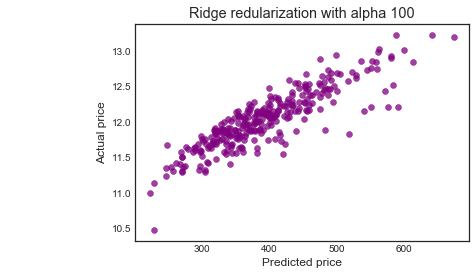

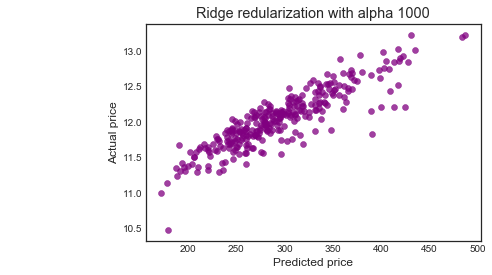

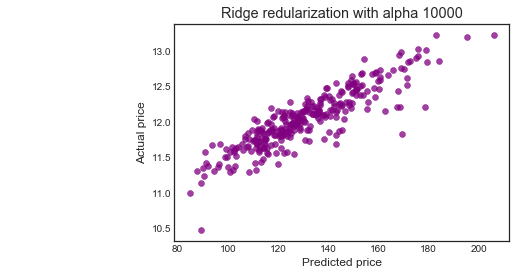

In [158]:
# from sklearn.metrics import mean_squared_error
# print("R^2: {}".format(ridge.score(Xtest, ytest)))
# mse=(mean_squared_error(ytest, ridge.predict(Xtest)))
# print("Mean Squared Error: {}".format(mse))
# rmse = np.sqrt(mean_squared_error(ytest, ridge.predict(Xtest)))
# print("Root Mean Squared Error: {}".format(rmse)) 

for i in range(-3, 5):
    alpha = 10**i
    ridge.set_params(alpha = alpha)
    ridge_model = ridge.fit(Xtrain, ytrain)
    preds_ridge = ridge_model.predict(Xtest)
    
    plt.scatter(preds_ridge, ytest, alpha= 0.75, c= 'purple')
    plt.xlabel('Predicted price')
    plt.ylabel('Actual price')
    plt.title('Ridge redularization with alpha {}'.format(alpha))
    overlay = 'R square: {} \nRMSE: {}'.format(ridge_model.score(Xtest, ytest), mean_squared_error(ytest, preds_ridge))
    plt.annotate(s = overlay, xy = (12.1, 10.6), size = 'x-large')
    plt.show()

In [37]:
ridge.fit(Xtrain, ytrain)

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

##from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)

In [38]:
# coefs = []
# intercepts = []
# R2  = []
# alphaRange = np.linspace(1e-3,200,20)
# for alpha in alphaRange:
#     ridge.set_params(alpha=alpha)  
#     ridge.fit(Xtrain,ytrain)
#     intercepts.append(ridge.intercept_)
#     coefs.append(ridge.coef_)
#     R2.append(ridge.score(Xtrain,ytrain)) 
    
# train_R2 = []
# test_R2  = []
# alphaRange = np.linspace(1e-5,200,20)
# for alpha in alphaRange:
#     ridge.set_params(alpha=alpha, normalize=False)  
#     ridge.fit(Xtrain, ytrain)
#     train_R2.append(ridge.score(Xtrain, ytrain))
#     test_R2.append(ridge.score(Xtest, ytest))    

In [39]:
# test_R2 

In [40]:
# from sklearn.metrics import mean_squared_error
# print("R^2: {}".format(ridge.score(Xtest, ytest)))
# mse=(mean_squared_error(ytest, ridge.predict(Xtest)))
# print("Mean Squared Error: {}".format(mse))
# rmse = np.sqrt(mean_squared_error(ytest, ridge.predict(Xtest)))
# print("Root Mean Squared Error: {}".format(rmse))  

# plt.plot(alphaRange, intercepts)
# plt.title('Change of Ridge Intercept Varying Alpha')

In [41]:
# coefs = pd.DataFrame(np.array(coefs), columns= X.columns)

# for name in coefs.columns:
#     plt.plot(alphaRange, coefs[name], label=name)
# plt.legend(loc=1)    
# plt.title('Change of Ridge Slopes Varying Alpha')

In [42]:
# ridge.set_params(alpha=45)
# ridge.fit(Xtrain, ytrain)
# coefDF = pd.Series(ridge.coef_, index=Xtrain.columns)
# print('The intercept is %.4f' %(ridge.intercept_))
# print('The slopes are %s' %(coefDF))

In [43]:
# alphaSize  = 40
# rhoSize    = 30
# alphaRange = np.linspace(1e-2, 10, alphaSize)
# rhoRange   = np.linspace(0.01, 1, rhoSize)
# trainR2    = np.zeros((alphaSize, rhoSize))
# testR2     = np.zeros((alphaSize, rhoSize))
# intercepts = np.zeros((alphaSize, rhoSize))
# coefs      = np.zeros((alphaSize, rhoSize, 85))

# net.set_params(normalize=True)

# for alphaIdx, alpha in enumerate(alphaRange):
#     for rhoIdx, rho in enumerate(rhoRange):
#         net.set_params(alpha=alpha, l1_ratio=rho)
#         net.fit(Xtrain, ytrain)
#         trainR2[alphaIdx, rhoIdx] = net.score(Xtrain, ytrain)
#         testR2[alphaIdx, rhoIdx]  = net.score(Xtest, ytest)
#         intercepts[alphaIdx, rhoIdx] = net.intercept_
#         coefs[alphaIdx, rhoIdx, :] = net.coef_

In [44]:
# from sklearn.linear_model import RidgeCV

# regr_cv = RidgeCV(alphas=[0.1, 1.0, 10.0])

# model_cv = regr_cv.fit(Xtrain, ytrain)

# model_cv.coef_

In [45]:
# model_cv.alpha_

In [46]:
# regr_cv.fit(Xtest, ytest).coef_
# # lst = []
# for i in (list(zip(regr_cv.fit(Xtest, ytest).coef_, Xtest.columns))):
#     lst.append(i)
# lst


In [47]:
# model_cv.score(Xtest, ytest)

In [48]:
# model_cv.fit(Xtest, ytest)

In [49]:
# plt.scatter(ytest, actual_values, alpha=.7, color='b') 
# #alpha helps to show overlapping data 
# plt.xlabel('Predicted Price')
# plt.ylabel('Actual Price') 
# plt.title('Linear Regression Model') plt.show()


In [50]:
test = pd.read_csv ("C:\\Users\\nilli\\Downloads\\test.csv")
test.shape

(1459, 80)

In [51]:
#test.drop("Id", axis = 1, inplace = True)

In [52]:
# dfnum =test1.select_dtypes(include =['float', 'int64'])
# dfnum 
test.shape

(1459, 80)

In [53]:
test.loc[1132, 'GarageYrBlt'] =2007

In [54]:
 
test['HaveFireplace'] = test.Fireplaces.apply(fire)

In [55]:
test['Exterior2nd']=test['Exterior2nd'].str.replace('CmentBd','CemntBd' )
test['Exterior2nd']=test['Exterior2nd'].str.replace('Brk Cmn','BrkComm' )
#trainFeaturesbare['Exterior2nd']=trainFeaturesbare['Exterior2nd'].str.replace('BrkComm','Other' )

material =['CemntBd','BrkFace','WdShing','Stucco','AsbShng','BrkComm','Stone','ImStucc','CBlock','AsphShn']
for mat in material:
    test['Exterior2nd']=df['Exterior2nd'].str.replace(mat,'Other' )
    
test['Exterior2nd'].value_counts()

VinylSd    504
MetalSd    214
HdBoard    206
Wd Sdng    197
Other      156
Plywood    142
Wd Shng     38
Name: Exterior2nd, dtype: int64

In [56]:
material =['CemntBd','BrkFace','WdShing','Stucco','AsbShng','BrkComm','Stone','ImStucc','CBlock','AsphShn']
for mat in material:
    test['Exterior1st']=df['Exterior1st'].str.replace(mat,'Other' )
    
test['Exterior1st'].value_counts()

VinylSd    515
HdBoard    221
MetalSd    220
Wd Sdng    206
Other      187
Plywood    108
Name: Exterior1st, dtype: int64

In [57]:
test['Exterior1st2nd'] = pd.Series(len(test['Exterior1st']), index=test.index)
test['Exterior1st2nd'] = test['Exterior1st']
test.loc[test['Exterior1st']!=test['Exterior2nd'],'Exterior1st2nd'] = 'Other'

In [58]:
# dfnum.columns[dfnum.isnull().any()]

In [59]:
# gb = pd.isnull(test["GarageYrBlt"])
# test[gb][["GarageYrBlt"]] 

In [60]:
test['LotFrontage'].median()

67.0

In [61]:
test["GarageYrBlt"].fillna(0, inplace=True)# house with no garage
test["LotFrontage"].fillna(67.0, inplace=True)# filled with median
test["MasVnrArea"].fillna(0, inplace=True) # house with no Masonry veneer

test['BsmtFinSF1'].fillna(0, inplace=True)
test['BsmtUnfSF'].fillna(0, inplace=True)
test['TotalBsmtSF'].fillna(0, inplace=True)
test['BsmtFullBath'].fillna(0, inplace=True)
test['GarageCars'].fillna(0, inplace=True)
test['GarageArea'].fillna(0, inplace=True)
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,HaveFireplace,Exterior1st2nd
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,6,2010,WD,Normal,1,VinylSd
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Gar2,12500,6,2010,WD,Normal,1,MetalSd
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,3,2010,WD,Normal,1,VinylSd
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2010,WD,Normal,1,Other
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,NaN,NaN,NaN,0,1,2010,WD,Normal,1,VinylSd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2006,WD,Normal,1,VinylSd
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2006,WD,Abnorml,1,VinylSd
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2006,WD,Abnorml,1,Plywood
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,Shed,700,7,2006,WD,Normal,1,Other


In [62]:
test.columns[test.isnull().any()]

Index(['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtHalfBath', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType'],
      dtype='object')

In [63]:
test["GarageCond"].fillna("No Garage", inplace=True)
test["GarageQual"].fillna("No Garage", inplace=True)
test["GarageFinish"].fillna("No Garage", inplace=True)
test["GarageType"].fillna("No Garage", inplace=True)
test['MSZoning'].fillna("RL", inplace=True)

test["Alley"].fillna("No alley access", inplace=True)
test["MasVnrType"].fillna("None", inplace=True)
test['Utilities'].fillna('AllPub', inplace=True)

test["BsmtQual"].fillna("No Basement", inplace=True)
test["BsmtCond"].fillna("No Basement", inplace=True)
test["BsmtExposure"].fillna("No Basement", inplace=True)
test["BsmtFinType1"].fillna("No Basement", inplace=True)
test["BsmtFinType2"].fillna("No Basement", inplace=True)
test["BsmtFinSF2"].fillna(0, inplace=True)
# test["Electrical"].fillna("SBrkr", inplace=True) ### mode
test["FireplaceQu"].fillna("No Fireplace", inplace=True)
test["PoolQC"].fillna("No Pool", inplace=True)
test["Fence"].fillna("No Fence", inplace=True)
test["MiscFeature"].fillna("None", inplace=True)
test['BsmtHalfBath'].fillna(0, inplace=True)
test['Exterior1st'].fillna('VinylSd', inplace=True)
test['Exterior2nd'].fillna('VinylSd', inplace=True)
test['KitchenQual'].fillna('TA', inplace=True)
test['Functional'].fillna('Typ', inplace=True)
test['SaleType'].fillna('WD', inplace=True)



test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,HaveFireplace,Exterior1st2nd
0,1461,20,RH,80.0,11622,Pave,No alley access,Reg,Lvl,AllPub,...,No Pool,MnPrv,None,0,6,2010,WD,Normal,1,VinylSd
1,1462,20,RL,81.0,14267,Pave,No alley access,IR1,Lvl,AllPub,...,No Pool,No Fence,Gar2,12500,6,2010,WD,Normal,1,MetalSd
2,1463,60,RL,74.0,13830,Pave,No alley access,IR1,Lvl,AllPub,...,No Pool,MnPrv,None,0,3,2010,WD,Normal,1,VinylSd
3,1464,60,RL,78.0,9978,Pave,No alley access,IR1,Lvl,AllPub,...,No Pool,No Fence,None,0,6,2010,WD,Normal,1,Other
4,1465,120,RL,43.0,5005,Pave,No alley access,IR1,HLS,AllPub,...,No Pool,No Fence,None,0,1,2010,WD,Normal,1,VinylSd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,No alley access,Reg,Lvl,AllPub,...,No Pool,No Fence,None,0,6,2006,WD,Normal,1,VinylSd
1455,2916,160,RM,21.0,1894,Pave,No alley access,Reg,Lvl,AllPub,...,No Pool,No Fence,None,0,4,2006,WD,Abnorml,1,VinylSd
1456,2917,20,RL,160.0,20000,Pave,No alley access,Reg,Lvl,AllPub,...,No Pool,No Fence,None,0,9,2006,WD,Abnorml,1,Plywood
1457,2918,85,RL,62.0,10441,Pave,No alley access,Reg,Lvl,AllPub,...,No Pool,MnPrv,Shed,700,7,2006,WD,Normal,1,Other


In [64]:
stats.mode(test['SaleType']).mode

array(['WD'], dtype=object)

In [65]:
test['BsmtHalfBath'].median()

0.0

In [66]:
test1=test[['Neighborhood','OverallQual','YearBuilt', 'YearRemodAdd',
        'RoofStyle','ExterQual','Foundation','BsmtFinSF1','HaveFireplace',
        'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','HeatingQC','Exterior2nd','Exterior1st',
        'GrLivArea', 'KitchenQual','Fireplaces','GarageArea']]

# 'Neighborhood','OverallQual','YearBuilt', 'YearRemodAdd',
#         'RoofStyle','Exterior1st',
#         'Exterior2nd','ExterQual','Foundation','BsmtFinSF1',
#         'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','HeatingQC',
#         'GrLivArea', 'KitchenQual','Fireplaces','GarageArea']]


In [67]:
test1

,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,ExterQual,Foundation,BsmtFinSF1,HaveFireplace,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,Exterior2nd,Exterior1st,GrLivArea,KitchenQual,Fireplaces,GarageArea
0,NAmes,5,1961,1961,Gable,TA,CBlock,468.0,1,144.0,270.0,882.0,TA,VinylSd,VinylSd,896,TA,0,730.0
1,NAmes,6,1958,1958,Hip,TA,CBlock,923.0,1,0.0,406.0,1329.0,TA,MetalSd,MetalSd,1329,Gd,0,312.0
2,Gilbert,5,1997,1998,Gable,TA,PConc,791.0,1,0.0,137.0,928.0,Gd,VinylSd,VinylSd,1629,TA,1,482.0
3,Gilbert,6,1998,1998,Gable,TA,PConc,602.0,1,0.0,324.0,926.0,Ex,Wd Shng,Wd Sdng,1604,Gd,1,470.0
4,StoneBr,8,1992,1992,Gable,Gd,PConc,263.0,1,0.0,1017.0,1280.0,Ex,VinylSd,VinylSd,1280,Gd,0,506.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,MeadowV,4,1970,1970,Gable,TA,CBlock,0.0,1,0.0,546.0,546.0,Gd,VinylSd,VinylSd,1092,TA,0,0.0
1455,MeadowV,4,1970,1970,Gable,TA,CBlock,252.0,1,0.0,294.0,546.0,TA,VinylSd,VinylSd,1092,TA,0,286.0
1456,Mitchel,5,1960,1996,Gable,TA,CBlock,1224.0,1,0.0,0.0,1224.0,Ex,Plywood,Plywood,1224,TA,1,576.0
1457,Mitchel,5,1992,1992,Gable,TA,PConc,337.0,1,0.0,575.0,912.0,TA,Other,Other,970,TA,0,0.0


In [68]:
X.shape

(1458, 65)

In [69]:
#  def fire(x):
# #     return 1 if x == 0 else 1
# # df['HaveFireplace'] = train.Fireplaces.apply(fire)
# # test['enc_condition'] = test.Fireplaces.apply(fire)

In [70]:
#Dummifying Neighborhood, ExterQual, KitchenQual, and Fireplaces columns

from sklearn.preprocessing import OneHotEncoder

#dummify Neighborhood column
Neighborhood_ohe = OneHotEncoder( drop='first', sparse = False )
Neighborhood_enc = Neighborhood_ohe.fit_transform( test1[['Neighborhood']] )
Neighborhood_enc = pd.DataFrame( Neighborhood_enc, columns=Neighborhood_ohe.get_feature_names(['Neighborhood']) )
test1 = pd.concat( (test1.drop(["Neighborhood"], axis=1).reset_index(drop = True), Neighborhood_enc), axis = 1 )

#dummify ExterQual Column
ExterQual_ohe = OneHotEncoder( drop='first', sparse = False )
ExterQual_enc = ExterQual_ohe.fit_transform( test1[['ExterQual']] )
ExterQual_enc = pd.DataFrame( ExterQual_enc, columns=ExterQual_ohe.get_feature_names(['ExterQual']) )
test1 = pd.concat( (test1.drop(["ExterQual"], axis=1).reset_index(drop = True), ExterQual_enc), axis = 1 )

# # dummify Fireplaces column
# Fireplaces_ohe = OneHotEncoder( drop='first', sparse = False, categories="auto" )
# Fireplaces_enc = Fireplaces_ohe.fit_transform(test1[['Fireplaces']] )
# Fireplaces_enc = pd.DataFrame( Fireplaces_enc, columns=Fireplaces_ohe.get_feature_names(['Fireplaces']) )
# test1 = pd.concat( (test1.drop(["Fireplaces"], axis=1).reset_index(drop = True), Fireplaces_enc), axis = 1 )


# dummify KitchenQual column
from sklearn.preprocessing import OneHotEncoder
KitchenQual_ohe = OneHotEncoder( drop='first', sparse = False )
KitchenQual_enc = KitchenQual_ohe.fit_transform( test1[['KitchenQual']] )
KitchenQual_enc = pd.DataFrame( KitchenQual_enc, columns=KitchenQual_ohe.get_feature_names(['KitchenQual']) )
test1 = pd.concat( (test1.drop(["KitchenQual"], axis=1).reset_index(drop = True), KitchenQual_enc), axis = 1 )


# dummify RoofStyle column
RoofStyle_ohe = OneHotEncoder( drop='first', sparse = False )
RoofStyle_enc = RoofStyle_ohe.fit_transform( test1[['RoofStyle']] )
RoofStyle_enc = pd.DataFrame( RoofStyle_enc, columns=RoofStyle_ohe.get_feature_names(['RoofStyle']) )
test1 = pd.concat( (test1.drop(["RoofStyle"], axis=1).reset_index(drop = True), RoofStyle_enc), axis = 1 )
test1.head()

#dummify Exterior1st Column
Exterior1st_ohe = OneHotEncoder( drop='first', sparse = False )
Exterior1st_enc = Exterior1st_ohe.fit_transform(test1[['Exterior1st']] )
Exterior1st_enc = pd.DataFrame( Exterior1st_enc, columns=Exterior1st_ohe.get_feature_names(['Exterior1st']) )
test1 = pd.concat( (test1.drop(["Exterior1st"], axis=1).reset_index(drop = True), Exterior1st_enc), axis = 1 )


#dummify Exterior2nd Column
Exterior2nd_ohe = OneHotEncoder( drop='first', sparse = False )
Exterior2nd_enc = Exterior2nd_ohe.fit_transform( test1[['Exterior2nd']] )
Exterior2nd_enc = pd.DataFrame( Exterior2nd_enc, columns=Exterior2nd_ohe.get_feature_names(['Exterior2nd']) )
test1 = pd.concat( (test1.drop(["Exterior2nd"], axis=1).reset_index(drop = True), Exterior2nd_enc), axis = 1 )

#dummify df["HaveFireplace"]
HaveFireplace_ohe = OneHotEncoder( drop='first', sparse = False )
HaveFireplace_enc = HaveFireplace_ohe.fit_transform( test1[["HaveFireplace"]] )
HaveFireplace_enc = pd.DataFrame( HaveFireplace_enc, columns=HaveFireplace_ohe.get_feature_names(["HaveFireplace"]) )
test1 = pd.concat( (test1.drop(["HaveFireplace"], axis=1).reset_index(drop = True), HaveFireplace_enc), axis = 1 )

#dummify Foundation Column
Foundation_ohe = OneHotEncoder( drop='first', sparse = False )
Foundation_enc = Foundation_ohe.fit_transform( test1[['Foundation']] )
Foundation_enc = pd.DataFrame( Foundation_enc, columns=Foundation_ohe.get_feature_names(['Foundation']) )
test1 = pd.concat( (test1.drop(["Foundation"], axis=1).reset_index(drop = True), Foundation_enc), axis = 1 )


#dummify Heating QC Column
HeatingQC_ohe = OneHotEncoder( drop='first', sparse = False )
HeatingQC_enc = HeatingQC_ohe.fit_transform( test1[['HeatingQC']] )
HeatingQC_enc = pd.DataFrame( HeatingQC_enc, columns=HeatingQC_ohe.get_feature_names(['HeatingQC']) )
test1 = pd.concat( (test1.drop(["HeatingQC"], axis=1).reset_index(drop = True), HeatingQC_enc), axis = 1 )

test1.head()

,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,GrLivArea,Fireplaces,GarageArea,...,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA
0,5,1961,1961,468.0,144.0,270.0,882.0,896,0,730.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,6,1958,1958,923.0,0.0,406.0,1329.0,1329,0,312.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,5,1997,1998,791.0,0.0,137.0,928.0,1629,1,482.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,6,1998,1998,602.0,0.0,324.0,926.0,1604,1,470.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,1992,1992,263.0,0.0,1017.0,1280.0,1280,0,506.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
X.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'Fireplaces', 'GarageArea',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker',
       'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'KitchenQual_Fa',
       'KitchenQual_Gd', 'KitchenQual_TA', 'RoofStyle_Gable',
       'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard',
       'RoofStyle_She

In [72]:
# submission = pd.DataFrame()
# submission['Id'] = test.Id

In [73]:
# feats = test.select_dtypes(
#         include=[np.number]).drop(['Id'], axis=1).interpolate()

In [74]:
# predictions = lasso3.predict(feats)
#final_predictions = np.exp(predictions)

In [75]:
#lasso2.fit(X, y)

In [76]:
X
X_cols = X.columns
test1_cols = test1.columns
diff = X_cols.difference(test1_cols)
diff

Index([], dtype='object')

In [77]:
# lasso2.fit(X, y).coef_
# lst = []
# for i in (list(zip(lasso2.fit(X, y).coef_, X.columns))):
#     lst.append(i)
# lst

In [78]:
ridge_model.predict(test1)

array([[117.34238293],
       [132.71301424],
       [133.52922407],
       ...,
       [135.66406166],
       [107.06168519],
       [145.48243187]])

In [79]:
ypredictions = np.exp(lasso2.predict(test1))
ypredictions

array([133409.64824904, 156658.26554527, 192562.09717642, ...,
       177294.08859858, 116328.58848697, 234592.10515545])

In [80]:
submission = pd.DataFrame()
submission['Id'] = test.Id

In [81]:
submission['SalePrice'] = ypredictions
submission.head()

,Id,SalePrice
0,1461,133409.648249
1,1462,156658.265545
2,1463,192562.097176
3,1464,185559.625926
4,1465,167723.419636


In [82]:
submission.shape

(1459, 2)

In [83]:
submission.to_csv('submission1.csv', index=False)

In [84]:
test[test.GarageYrBlt>2010]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,HaveFireplace,Exterior1st2nd


In [85]:
test.loc[1132, 'GarageYrBlt'] =2007

In [86]:
df[df.GarageYrBlt>2010]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Exterior1st2nd,HaveFireplace


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import glmnet as gln

from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

%matplotlib inline
plt.style.use('seaborn-white')

In [88]:
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

print(pca.components_.shape)
pd.DataFrame(pca.components_.T).loc[:4,:5]

(65, 65)


,0,1,2,3,4,5
0,0.264099,-0.146902,0.115129,0.048364,-0.021376,0.073580
1,0.261173,-0.079502,-0.231824,0.009088,0.060878,-0.088840
2,0.251891,0.019429,-0.059976,-0.000108,-0.008212,0.021239
3,0.060656,-0.298673,-0.063876,0.066089,-0.008094,-0.057566
4,-0.040698,-0.133921,-0.029130,-0.054457,-0.032640,0.030866


In [89]:
print(X_reduced.shape)
pd.DataFrame(X_reduced).loc[:4,:5]

(1458, 65)


,0,1,2,3,4,5
0,3.722134,1.654891,-1.336167,-0.669363,0.101381,-0.392122
1,-1.741670,-1.367854,-1.114350,2.793357,0.713750,2.133153
2,3.982186,1.324346,-0.941842,-0.705876,-0.014237,-0.062145
3,-0.948053,0.573435,3.122070,-1.167709,-0.112975,2.267393
4,4.749570,-0.226204,0.329572,-0.054600,-0.324918,0.859081


In [90]:
# Variance explained by the principal components
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([13.42, 18.59, 22.69, 26.38, 29.84, 32.87, 35.5 , 37.99, 40.24,
       42.37, 44.36, 46.29, 48.2 , 50.04, 51.87, 53.68, 55.43, 57.17,
       58.89, 60.58, 62.23, 63.86, 65.49, 67.11, 68.7 , 70.28, 71.84,
       73.39, 74.9 , 76.37, 77.81, 79.23, 80.62, 82.  , 83.34, 84.61,
       85.87, 87.1 , 88.32, 89.46, 90.57, 91.62, 92.57, 93.46, 94.27,
       95.  , 95.67, 96.33, 96.89, 97.42, 97.89, 98.29, 98.66, 99.  ,
       99.31, 99.5 , 99.62, 99.73, 99.82, 99.87, 99.91, 99.94, 99.96,
       99.98, 99.98])

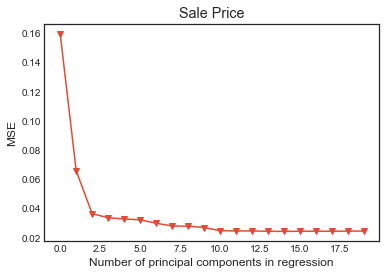

In [95]:
# 10-fold CV, with shuffle
n = len(X_reduced)
kf_10 = KFold(n_splits=10, shuffle=True, random_state=0)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*cross_val_score(regr, np.ones((n,1)), y.values.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*cross_val_score(regr, X_reduced[:,:i], y.values.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Sale Price')
plt.xlim(xmin=-1);

In [96]:
regr_test = LinearRegression()
regr_test.fit(X_reduced, y)
regr_test.coef_

array([[ 1.03740008e-01, -9.36120120e-02,  3.25476375e-02,
         1.93634313e-02, -1.62092112e-02,  3.49516065e-02,
        -3.34665077e-02,  1.21348972e-02,  2.45295140e-02,
        -3.95300896e-02, -1.45903992e-02,  1.27173561e-04,
        -1.46830922e-02, -9.84627447e-03, -7.78714199e-04,
        -1.68276184e-03,  7.65226084e-03, -4.86825630e-03,
         1.63764229e-03,  7.57038359e-03, -4.47763453e-03,
         2.51548374e-03,  1.76372327e-03, -5.50403605e-03,
         9.12062663e-03,  5.69509201e-03,  6.35477298e-03,
         1.41098272e-03,  5.37156271e-03, -1.06964998e-02,
         1.86962583e-02, -8.44510729e-03,  4.60477354e-03,
         9.78948437e-03, -2.11644220e-02,  1.76526374e-02,
        -2.09190046e-02, -2.90188529e-03, -1.62203475e-02,
        -1.12289970e-03,  1.67307114e-03,  7.44886759e-03,
         3.21899850e-02,  2.00890293e-02,  4.41536899e-02,
        -1.45744836e-02,  7.48139420e-02, -6.86158594e-03,
         3.87514417e-02,  1.05631412e-02,  3.03742372e-0

C:\Users\nilli\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


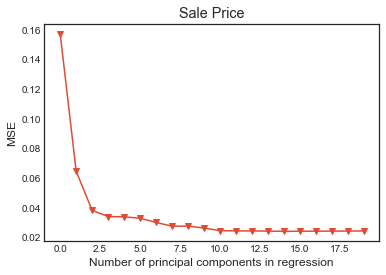

In [155]:
pca2 = PCA()
X_reduced_train = pca2.fit_transform(scale(Xtrain))
n = len(X_reduced_train)

# 10-fold CV, with shuffle
kf_10 = KFold(n_splits=10, shuffle=False, random_state=1)

mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*cross_val_score(regr, np.ones((n,1)), ytrain, cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*cross_val_score(regr, X_reduced_train[:,:i], ytrain, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

plt.plot(np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Sale Price')
plt.xlim(xmin=-1);
plt.savefig('MSE of the Principal Components Regression.png')

In [156]:
X_reduced_test = pca2.transform(scale(Xtest))[:,:14]

# Train regression model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:14], ytrain)

Prediction with test data
pred = regr.predict(X_reduced_test)
mean_squared_error(ytest, pred)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [152]:
pred = regr.predict(pca2.transform(scale(test1))[:,:14])
# mean_squared_error(ytest, pred)

In [153]:
np.exp(pred)

array([[125848.34470749],
       [155751.38204625],
       [176081.54834923],
       ...,
       [169268.35190896],
       [120502.8023557 ],
       [200153.22407318]])

In [135]:
ypredictions=np.exp(pred)
ypredictions

array([[126095.07345974],
       [155346.75901484],
       [174924.70109956],
       ...,
       [169790.36718753],
       [120057.05236385],
       [200169.95705656]])

In [147]:
submissionPCR = pd.DataFrame()
submissionPCR['Id'] = test.Id

In [148]:
submissionPCR['SalePrice'] = ypredictions
submissionPCR.head()

,Id,SalePrice
0,1461,126095.073460
1,1462,155346.759015
2,1463,174924.701100
3,1464,193599.988748
4,1465,208981.354786


In [149]:
submissionPCR.shape

(1459, 2)

In [150]:
submissionPCR.to_csv('submission3.csv', index=False)